## Matrix Multiplication Performance comparison

This notebook compares the performance of plain python, numpy and pytorch when performing matrix multiplication.

#### Defining utility functions

In [1]:
import time
import random


def measure_runtime(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        runtime = end_time-start_time
        return result, runtime
    return wrapper

MATRIX_DIM = 500
MAX_N = 100

#### Plain Python

In [3]:
def generate_matrix():
    return [[random.randint(0, MAX_N) for _ in range(MATRIX_DIM)] for _ in range(MATRIX_DIM)]


@measure_runtime
def matrix_multiply_plain_python(A, B):
    n, m = len(A), len(B[0])
    p = len(B)
    result = [[0] * m for _ in range(n)]
    
    for i in range(n):
        for j in range(m):
            for k in range(p):
                result[i][j] += A[i][k] * B[k][j]
                
    return result

A = generate_matrix()
B = generate_matrix()


result, runtime_plain = matrix_multiply_plain_python(A, B)
runtime_plain

7.095006942749023

#### NumPy

In [6]:
import numpy as np

A = np.random.randint(0, MAX_N, size=(MATRIX_DIM, MATRIX_DIM))
B = np.random.randint(0, MAX_N, size=(MATRIX_DIM, MATRIX_DIM))


@measure_runtime
def matrix_multiply_numpy():
    return np.dot(A, B)

result, runtime_numpy = matrix_multiply_numpy()
runtime_numpy

0.062333106994628906

#### PyTorch

In [5]:
import torch

A = torch.randint(0, MAX_N, (MATRIX_DIM, MATRIX_DIM), dtype=torch.float32)
B = torch.randint(0, MAX_N, (MATRIX_DIM, MATRIX_DIM), dtype=torch.float32)


@measure_runtime
def matrix_multiply_pytorch():
    return torch.mm(A, B)


result, runtime_pytorch = matrix_multiply_pytorch()
runtime_pytorch

0.0020856857299804688

#### Comparison

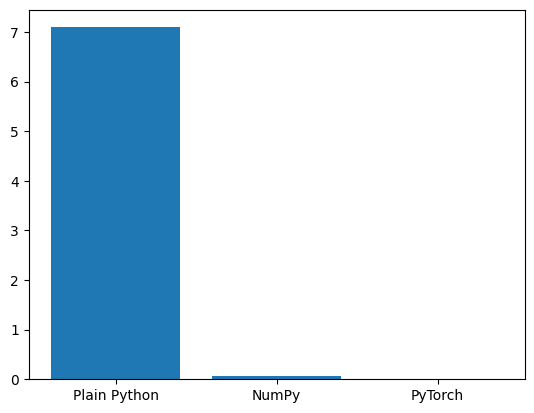

In [7]:
import matplotlib.pyplot as plt

categories = ['Plain Python', 'NumPy', 'PyTorch']
values = [runtime_plain, runtime_numpy, runtime_pytorch]

plt.bar(categories, values)

plt.show()